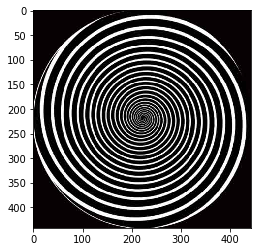

In [1]:
import skimage
import matplotlib.pyplot as plt
from skimage import io

img=io.imread('Hypnotic-spiral.jpg')
plt.imshow(img)

In [2]:
#Dimensionality reduction,Clustering and nearest neighbors of peptide reads
import pandas as pd
import numpy as np

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df=pd.read_csv('mhc_train.csv')
lines=list(df['sequence'])

In [4]:
import scipy.io

from numpy import argmax

X=[]

for i in range(0,len(lines)):
    
    data=lines[i]
    alphabet = 'ARNDCQEGHILKMFPSTWYVX'
# define a mapping of chars to integers
    char_to_int = dict((c, i) for i, c in enumerate(alphabet))
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
# integer encode input data
    integer_encoded = [char_to_int[char] for char in data]
    X.append(integer_encoded)

X=np.array(X)  

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
#PCA for Kmeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import Neigh
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)


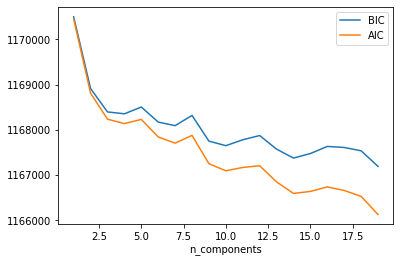

In [21]:
#Figuring out Optimal number of clusters from AIC and BIC


n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalComponents)
          for n in n_components]

plt.plot(n_components, [m.bic(principalComponents) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalComponents) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


In [26]:
#Gaussian Mixture Modeling for clustering
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)

gmm.fit(principalComponents)
result = gmm.predict(principalComponents)

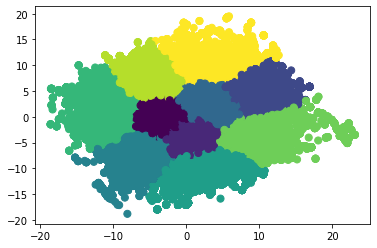

In [27]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=result, s=50, cmap='viridis')

In [33]:
#Nearest neighbors

from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3).fit(principalComponents)

In [34]:
distances, indices = nbrs.kneighbors(principalComponents)